<a href="https://colab.research.google.com/github/sravyakeerthanak/devops/blob/main/ANN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:

x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(x,y,index):
  plt.figure(figsize=(15,0.3))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

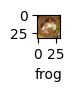

In [ ]:
plot_sample(x_train,y_train,0)

NORMALISING THE TRAINING DATA

In [ ]:
x_train=x_train/255.0

In [ ]:
x_test=x_test/255.0

SPECIFYING ANN MODEL

In [ ]:
ANN=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                       layers.Dense(3000,activation='relu'),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(10,activation='softmax')])

In [ ]:
ANN.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN.fit(x_train,y_train,epochs=4)

Epoch 1/4
1563/1563 [==============================] - 145s 92ms/step - loss: 1.6247 - accuracy: 0.4263
Epoch 2/4
1563/1563 [==============================] - 137s 88ms/step - loss: 1.5440 - accuracy: 0.4568
Epoch 3/4
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4825 - accuracy: 0.4774
Epoch 4/4
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4299 - accuracy: 0.4952


In [15]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict=ANN.predict(x_test)
y_predict_classes=[np.argmax(element)for element in y_predict]
print("classificationreport",classification_report(y_test,y_predict_classes))

313/313 [==============================] - 17s 53ms/step
classificationreport               precision    recall  f1-score   support

           0       0.56      0.48      0.51      1000
           1       0.57      0.64      0.60      1000
           2       0.42      0.15      0.23      1000
           3       0.45      0.19      0.27      1000
           4       0.30      0.59      0.40      1000
           5       0.51      0.26      0.34      1000
           6       0.40      0.69      0.50      1000
           7       0.66      0.42      0.51      1000
           8       0.43      0.79      0.55      1000
           9       0.66      0.37      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000

